# TOKYO

#### ANÁLISIS ALOJAMIENTOS AIRBNB TOKYO 

#### INSIDE AIRBNB: TOKYO, JAPAN


---
## 1. Librerías

In [1]:
import numpy as np
import pandas as pd
import re
import warnings
from pandas.errors import SettingWithCopyWarning
# Gráficas
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Mapas interactivos
import folium
from folium import plugins
from folium.plugins import FastMarkerCluster
import geopandas as gpd
import nltk
from nltk.corpus import stopwords
from PIL import Image 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import LabelEncoder

In [2]:
# Cambiar las opciones de pandas para que nos muestre todas las columnas
pd.set_option('display.max_columns', None)

In [3]:
warnings.simplefilter(action='ignore', category=(SettingWithCopyWarning))

In [4]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

## 2. Lectura y visualización de dataset

In [2]:
listings = pd.read_csv(r'C:\Users\Jesús\Desktop\GitHub\TOKYO_AIRBNB\listings.csv')
data = pd.read_csv(r'C:\Users\Jesús\Desktop\GitHub\TOKYO_AIRBNB\listings2.csv')
reviews = pd.read_csv(r'C:\Users\Jesús\Desktop\GitHub\TOKYO_AIRBNB\reviews.csv')
com = pd.read_csv(r'C:\Users\Jesús\Desktop\GitHub\TOKYO_AIRBNB\reviews2.csv')
cal = pd.read_csv(r'C:\Users\Jesús\Desktop\GitHub\TOKYO_AIRBNB\calendar.csv')
barrio = pd.read_csv(r'C:\Users\Jesús\Desktop\GitHub\TOKYO_AIRBNB\neighbourhoods.csv')

In [6]:
print('Dimensiones listings:',data.shape)
print('Dimensiones listings:',listings.shape)
print('Dimensiones calendar:',cal.shape)
print('Dimensiones reseñas:',com.shape)
print('Dimensiones barrio:',barrio.shape)

Dimensiones listings: (13725, 75)
Dimensiones listings: (13725, 18)
Dimensiones calendar: (5006656, 7)
Dimensiones reseñas: (504433, 6)
Dimensiones barrio: (62, 2)


In [7]:
data.head(1)

id                          listing_url       scrape_id last_scraped  \
0  197677  https://www.airbnb.com/rooms/197677  20231227173752   2023-12-28   

        source                                                         name  \
0  city scrape  Rental unit in Sumida · ★4.77 · 1 bedroom · 2 beds · 1 bath   

   description neighborhood_overview  \
0          NaN                   NaN   

                                                       picture_url  host_id  \
0  https://a0.muscache.com/pictures/38437056/d27fa43f_original.jpg   964081   

                                   host_url        host_name  host_since  \
0  https://www.airbnb.com/users/show/964081  Yoshimi & Marek  2011-08-13   

  host_location  \
0  Tokyo, Japan   

                                                                                     host_about  \
0  Would love to travel all over the world and meet and feel the different people and cultures.   

  host_response_time host_response_rate host_acceptance_rate  \
0       within a day               100%                 100%   

  host_is_superhost  \
0                 t   

                                                                                     host_thumbnail_url  \
0  https://a0.muscache.com/im/users/964081/profile_pic/1319512318/original.jpg?aki_policy=profile_small   

                                                                                          host_picture_url  \
0  https://a0.muscache.com/im/users/964081/profile_pic/1319512318/original.jpg?aki_policy=profile_x_medium   

  host_neighbourhood  host_listings_count  host_total_listings_count  \
0    Sumida District                    1                          2   

   host_verifications host_has_profile_pic host_identity_verified  \
0  ['email', 'phone']                    t                      t   

  neighbourhood neighbourhood_cleansed  neighbourhood_group_cleansed  \
0           NaN              Sumida Ku                           NaN   

   latitude  longitude       property_type        room_type  accommodates  \
0  35.71707  139.82608  Entire rental unit  Entire home/apt             2   

   bathrooms bathrooms_text  bedrooms  beds amenities       price  \
0        NaN         1 bath       NaN   2.0        []  $12,000.00   

   minimum_nights  maximum_nights  minimum_minimum_nights  \
0               3            1125                     3.0   

   maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
0                     3.0                  1125.0                  1125.0   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm  calendar_updated  \
0                     3.0                  1125.0               NaN   

  has_availability  availability_30  availability_60  availability_90  \
0                t                0                0                0   

   availability_365 calendar_last_scraped  number_of_reviews  \
0                80            2023-12-28                174   

   number_of_reviews_ltm  number_of_reviews_l30d first_review last_review  \
0                      7                       0   2011-09-21  2023-11-18   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  4.77                    4.74                       4.92   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.84                         4.83                    4.54   

   review_scores_value     license instant_bookable  \
0                 4.79  M130003350                f   

   calculated_host_listings_count  \
0                               1   

   calculated_host_listings_count_entire_homes  \
0                                            1   

   calculated_host_listings_count_private_rooms  \
0                                             0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            0               1.16

In [8]:
cal.head(1)

listing_id        date available       price  adjusted_price  \
0      197677  2023-12-28         f  $12,000.00             NaN   

   minimum_nights  maximum_nights  
0             3.0          1125.0

In [9]:
com.head(1)

listing_id      id        date  reviewer_id reviewer_name  \
0      197677  554285  2011-09-21      1002142         Pablo   

                                                                                                                                                                                                                                                                                                                                                                                               comments  
0  Couldn’t get any better!\r<br/>\r<br/>The apartment itself is great; it has everything you could need.\r<br/>\r<br/>Besides that the neighborhood itself is very friendly fill with family life energy. Really close to a supermarket, some convenience stores and train stations, you will feel like home from the first moment and if you forget to pack something you could easily get it.\r<br/>

In [10]:
barrio.head(1)

neighbourhood_group neighbourhood
0                  NaN     Adachi Ku

---
## 3. Información del dataset principal de anuncios

- Información general

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13725 entries, 0 to 13724
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            13725 non-null  int64  
 1   listing_url                                   13725 non-null  object 
 2   scrape_id                                     13725 non-null  int64  
 3   last_scraped                                  13725 non-null  object 
 4   source                                        13725 non-null  object 
 5   name                                          13725 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         9072 non-null   object 
 8   picture_url                                   13725 non-null  object 
 9   host_id                                       13725 non-null 

<Axes: >

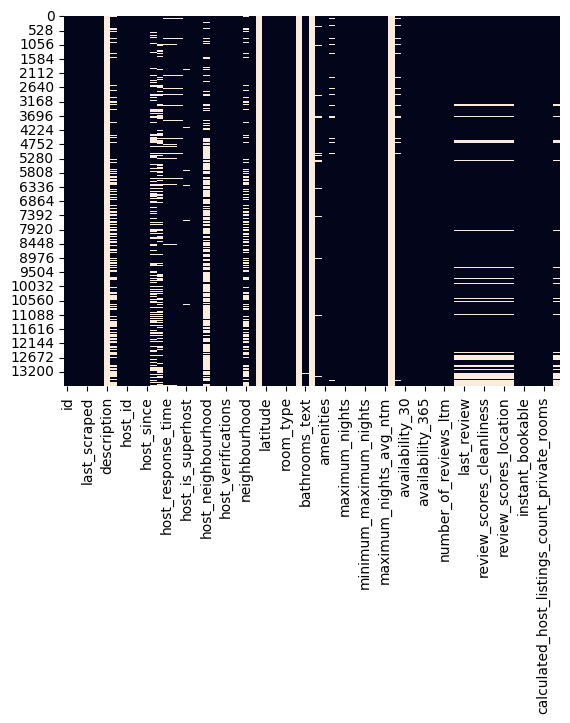

In [12]:
sns.heatmap(data.isnull(), cbar=False) # Vemos los nulos con un gráfico heatmap

In [13]:
nulos = data.isnull().sum()
nulos[nulos>0] #Vemos solo las columnas con nulos
nulos[nulos>0] / len(data) * 100 

description                     100.000000
neighborhood_overview            33.901639
host_location                    32.116576
host_about                       30.448087
host_response_time                3.803279
host_response_rate                3.803279
host_acceptance_rate              2.214936
host_is_superhost                 1.326047
host_neighbourhood               56.706740
neighbourhood                    33.901639
neighbourhood_group_cleansed    100.000000
bathrooms                       100.000000
bathrooms_text                    0.313297
bedrooms                        100.000000
beds                              4.794171
price                             3.009107
minimum_minimum_nights            0.014572
maximum_minimum_nights            0.014572
minimum_maximum_nights            0.014572
maximum_maximum_nights            0.014572
minimum_nights_avg_ntm            0.014572
maximum_nights_avg_ntm            0.014572
calendar_updated                100.000000
has_availab

In [14]:
# Vamos a ver si hay valores duplicados
data.duplicated().sum()

0

In [15]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [16]:
nulos = data.isnull().sum()
nulos['host_is_superhost']

182

- Creación de una copia de los dataset para trabajar con ellos

In [17]:
df1 = data.copy()
df2 = cal.copy()
df3 = com.copy()
df4 = barrio.copy()

- Creación del dataset de trabajo con las columnas de interés

In [18]:
df = df1[['name', 'neighbourhood_cleansed', 'longitude','latitude','host_location','host_id', 'host_since','host_response_rate','host_acceptance_rate','host_is_superhost','host_listings_count','host_has_profile_pic','license', 'property_type','room_type','accommodates','bathrooms_text','price', 'availability_30', 'availability_60', 'availability_90','number_of_reviews','review_scores_rating','review_scores_location','reviews_per_month']]

## 4. Preprocesamiento

### Tratamiento de columnas

#### Pasamos yenes a euro, tasa del 4 de abril. 
#### 1 jpy = 0.0061 euro 

In [19]:
df['price']

0           $12,000.00
1            $8,541.00
2           $27,759.00
3                  NaN
4           $26,775.00
5            $6,014.00
6           $12,000.00
7           $12,000.00
8           $54,706.00
9           $15,000.00
10           $8,000.00
11          $52,857.00
12          $33,257.00
13          $71,182.00
14          $24,200.00
15          $61,429.00
16           $6,600.00
17          $44,286.00
18          $16,857.00
19           $9,566.00
20          $35,000.00
21          $57,143.00
22           $9,566.00
23           $7,277.00
24           $7,203.00
25           $4,500.00
26           $8,541.00
27                 NaN
28          $70,543.00
29         $131,429.00
30          $10,000.00
31          $12,629.00
32          $15,000.00
33          $18,500.00
34           $4,329.00
35          $13,143.00
36          $10,413.00
37          $37,857.00
38           $9,965.00
39          $40,000.00
40           $5,129.00
41           $4,800.00
42           $9,963.00
43         

In [45]:
df['price'] = df['price'].str.replace(r'[^0-9.]', '', regex=True)
df['price'] = df['price'].fillna('').astype(str).str.replace('$', '', regex=True).str.replace(',', '') 
df['price'] = df['price'].replace('', 'nan').astype(float) # Luego se reemplazan los nulos por NaN de nuevo

In [46]:
df['price']

0          12000.0
1           8541.0
2          27759.0
3              NaN
4          26775.0
5           6014.0
6          12000.0
7          12000.0
8          54706.0
9          15000.0
10          8000.0
11         52857.0
12         33257.0
13         71182.0
14         24200.0
15         61429.0
16          6600.0
17         44286.0
18         16857.0
19          9566.0
20         35000.0
21         57143.0
22          9566.0
23          7277.0
24          7203.0
25          4500.0
26          8541.0
27             NaN
28         70543.0
29        131429.0
30         10000.0
31         12629.0
32         15000.0
33         18500.0
34          4329.0
35         13143.0
36         10413.0
37         37857.0
38          9965.0
39         40000.0
40          5129.0
41          4800.0
42          9963.0
43          5029.0
44         31114.0
45         48000.0
46         17000.0
47         17429.0
48         39000.0
49          9452.0
50          7277.0
51          7277.0
52          

In [47]:
tasa_cambio = 0.0061
df['price'] = df['price'] * tasa_cambio

In [48]:
df['price'] = df['price'].round(2)

In [49]:
df.head(2)

name  \
0  Rental unit in Sumida · ★4.77 · 1 bedroom · 2 beds · 1 bath   
1  Home in Kita-ku · ★4.98 · 1 bedroom · 1 bed · 1 shared bath   

  neighbourhood_cleansed  longitude  latitude host_location  host_id  \
0              Sumida Ku  139.82608  35.71707  Tokyo, Japan   964081   
1                Kita Ku  139.76917  35.73844         Japan   801494   

   host_since host_response_rate host_acceptance_rate host_is_superhost  \
0  2011-08-13               100%                 100%                 t   
1  2011-07-10               100%                 100%                 t   

   host_listings_count host_has_profile_pic license         property_type  \
0                    1                    t   M1300    Entire rental unit   
1                    1                    t   M1300  Private room in home   

         room_type  accommodates bathrooms_text  price  availability_30  \
0  Entire home/apt             2         1 bath   73.2                0   
1     Private room             1  1 shared bath   52.1                5   

   availability_60  availability_90  number_of_reviews  review_scores_rating  \
0                0                0                174                  4.77   
1               15               16                249                  4.98   

   review_scores_location  reviews_per_month  
0                    4.54               1.16  
1                    4.84               1.85

In [50]:
tasa_cambio = 0.0061
listings['price'] = listings['price'] * tasa_cambio

In [51]:
listings['price'] = listings['price'].round(2)

### Tratamiento de valores nulos

In [52]:
df.columns

Index(['name', 'neighbourhood_cleansed', 'longitude', 'latitude',
       'host_location', 'host_id', 'host_since', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'license', 'property_type', 'room_type',
       'accommodates', 'bathrooms_text', 'price', 'availability_30',
       'availability_60', 'availability_90', 'number_of_reviews',
       'review_scores_rating', 'review_scores_location', 'reviews_per_month'],
      dtype='object')

In [53]:
nulos = df.isnull().sum()
nulos[nulos>0] / len(df) * 100

host_location             32.104802
host_response_rate         3.809663
host_acceptance_rate       2.211356
host_is_superhost          1.328273
bathrooms_text             0.233543
price                      2.984966
review_scores_rating      11.764706
review_scores_location    11.808495
reviews_per_month         11.808495
dtype: float64

In [54]:
media_price = df['price'].mean()
df['price'] = df['price'].fillna(media_price)
media_price

183.42523734296245

In [55]:
df['host_response_rate']

0        100%
1        100%
2         97%
3         33%
4        100%
5        100%
6        100%
7        100%
8        100%
9        100%
10        60%
11       100%
12       100%
13       100%
14        97%
15        90%
16       100%
17       100%
18       100%
19       100%
20       100%
21       100%
22       100%
23       100%
24       100%
25       100%
26       100%
27       100%
28       100%
29       100%
30       100%
31       100%
32       100%
33       100%
34       100%
35       100%
36       100%
37       100%
38       100%
39       100%
40       100%
41       100%
42       100%
43       100%
44       100%
45       100%
46       100%
47       100%
48       100%
49       100%
50       100%
51       100%
52       100%
53       100%
54       100%
55        NaN
56       100%
57       100%
58       100%
59       100%
60       100%
61       100%
62       100%
63       100%
64       100%
65       100%
66       100%
67       100%
68       100%
69       100%
70       100%
71    

In [56]:
df['host_response_rate'] = df['host_response_rate'].fillna('').astype(str).str.replace('%', '').replace('', 'nan').astype(float) # Quitar % detrás del numero
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna('').astype(str).str.replace('%', '').replace('', 'nan').astype(float) # Quitar % detrás del numero

In [57]:
mappeo = {'t' : 0, 'f' : 1}
df['host_is_superhost'] = df['host_is_superhost'].replace(mappeo)

In [58]:
df['host_is_superhost']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        1.0
6        1.0
7        1.0
8        0.0
9        0.0
10       1.0
11       1.0
12       0.0
13       0.0
14       0.0
15       0.0
16       1.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       1.0
26       0.0
27       1.0
28       0.0
29       1.0
30       0.0
31       1.0
32       0.0
33       0.0
34       1.0
35       1.0
36       1.0
37       0.0
38       0.0
39       0.0
40       1.0
41       1.0
42       1.0
43       0.0
44       0.0
45       0.0
46       0.0
47       0.0
48       0.0
49       1.0
50       0.0
51       0.0
52       0.0
53       0.0
54       0.0
55       1.0
56       1.0
57       0.0
58       0.0
59       0.0
60       0.0
61       0.0
62       0.0
63       0.0
64       0.0
65       0.0
66       0.0
67       0.0
68       0.0
69       1.0
70       0.0
71       0.0
72       1.0
73       0.0
74       0.0
75       1.0
76       0.0

In [59]:
df.dropna(subset=['host_is_superhost'], inplace=True)

In [60]:
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].mean())
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].mean())
df['price'] = df['price'].fillna(df['price'].mean()) 
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mean())
df['review_scores_location'] = df['review_scores_location'].fillna(df['review_scores_location'].mean())
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mean())
df['host_listings_count'] = df['host_listings_count'].fillna(df['host_listings_count'].median()).astype(int)

In [ ]:
nulos = df.isnull().sum()
nulos[nulos>0] / len(df) * 100

host_location     32.311895
license            0.007384
bathrooms_text     0.317507
dtype: float64

- Analizamos licencias

In [61]:
df = df.dropna(subset=['license'])

In [62]:
df['license'].value_counts()

license
M1300                           6742
Hotels and Inns Business Act    6439
Special Economic Zoning Act      329
M5400                             10
Name: count, dtype: int64

In [23]:
valores_unicos_licencia = df['license'].unique()
valores_unicos_licencia

array(['M130003350', 'M130000243',
       'Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生収第4972号', ...,
       'M130010532', 'M130032122', 'M130022952'], dtype=object)

In [24]:
license_hotel = 'Hotels and Inns Business Act'
license_special = 'Special Economic Zoning Act'
license_M1300 = 'M1300'
license_M5400 = 'M5400'

In [25]:
df.loc[df['license'].str.contains(license_hotel), 'license'] = license_hotel
df.loc[df['license'].str.contains(license_special), 'license'] = license_special
df.loc[df['license'].str.contains(license_M1300), 'license'] = license_M1300
df.loc[df['license'].str.contains(license_M5400), 'license'] = license_M5400

In [63]:
license_m1300 = 'm1300'
license_M1200 = 'M1200'
df.loc[df['license'].str.contains(license_M1200), 'license'] = license_M1300
df.loc[df['license'].str.contains(license_m1300), 'license'] = license_M1300

In [27]:
df['license'].value_counts()

license
M1300                           6834
Hotels and Inns Business Act    6551
Special Economic Zoning Act      329
M5400                             10
Name: count, dtype: int64

In [28]:
# df['license_code'] = df['license'].map({'Hotels and Inns Business Act' : 0, 'M1300' : 1, 'Special Economic Zoning Act' : 2, 'M5400' : 3})

### Tratamiento de outliers

In [29]:
# df['neighbourhood_cleansed'] está duplicada no se por qué
df = df.drop_duplicates()

In [30]:
df.columns

Index(['name', 'neighbourhood_cleansed', 'longitude', 'latitude',
       'host_location', 'host_id', 'host_since', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'license', 'property_type', 'room_type',
       'accommodates', 'bathrooms_text', 'price', 'availability_30',
       'availability_60', 'availability_90', 'number_of_reviews',
       'review_scores_rating', 'review_scores_location', 'reviews_per_month'],
      dtype='object')

In [64]:
df['price']

0          73.200000
1          52.100000
2         169.330000
3         183.425237
4         163.330000
5          36.690000
6          73.200000
7          73.200000
8         333.710000
9          91.500000
10         48.800000
11        322.430000
12        202.870000
13        434.210000
14        147.620000
15        374.720000
16         40.260000
17        270.140000
18        102.830000
19         58.350000
20        213.500000
21        348.570000
22         58.350000
23         44.390000
24         43.940000
25         27.450000
26         52.100000
27        183.425237
28        430.310000
29        801.720000
30         61.000000
31         77.040000
32         91.500000
33        112.850000
34         26.410000
35         80.170000
36         63.520000
37        230.930000
38         60.790000
39        244.000000
40         31.290000
41         29.280000
42         60.770000
43         30.680000
44        189.800000
45        292.800000
46        103.700000
47        106

In [65]:
from scipy.stats import zscore #Zscore calcula los outliers en el sentido de que si se encuentra más allá de X desvios std son considerados outlier

column_zscores = zscore(df['price'])
outliers = df[(column_zscores > 2.5) | (column_zscores < -2.5)]

outliers.value_counts().sum()

62

In [66]:
df = df[(column_zscores <= 2.5) & (column_zscores >= -2.5)]

In [67]:
def remove_outliers(df, columns, threshold=1.5):
    """
    Elimina outliers de un DataFrame en las columnas especificadas utilizando el método del rango intercuartil (IQR).

    :param df: DataFrame de pandas
    :param columns: Lista de columnas en las que se deben eliminar los outliers
    :param threshold: Umbral para determinar outliers, el valor predeterminado es 1.5
    :return: DataFrame sin outliers
    """
    df_nuevo = df.copy()
    
    for column in columns:
        Q1 = df_nuevo[column].quantile(0.25)
        Q3 = df_nuevo[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df_no_outliers = df_nuevo[(df_nuevo[column] >= lower_bound) & (df_nuevo[column] <= upper_bound)]
    
    return df_nuevo
df_nuevo = remove_outliers(df,['price'])

In [68]:
fig = px.histogram(df_nuevo, x= 'price', nbins=30, marginal='violin',
                title ='Distribución de precio', template= "plotly", 
                color_discrete_sequence=['black'])

fig.update_layout(height=600, width=1000)

fig.show()

In [69]:
import plotly.io as pio

# Guardar la figura como archivo HTML
pio.write_html(fig, "distribucion_precio.html")

### Reviews per month

In [70]:
df['review_scores_rating'].unique()

array([4.77      , 4.98      , 4.78      , 4.95      , 4.89      ,
       4.75      , 4.86      , 4.92      , 4.97      , 4.8       ,
       4.62      , 4.94      , 4.9       , 4.81      , 4.91      ,
       4.39      , 4.79      , 4.93      , 4.85      , 4.82      ,
       4.72      , 4.48      , 4.63      , 5.        , 4.51      ,
       4.53      , 4.96      , 4.45      , 4.88      , 4.56      ,
       4.73      , 4.76      , 4.43      , 4.52      , 4.6       ,
       4.87      , 4.3       , 4.2       , 4.71      , 4.74      ,
       4.47      , 4.84      , 4.66      , 4.59      , 4.68      ,
       4.83      , 4.42      , 4.31      , 4.99      , 4.7       ,
       4.69      , 4.27      , 4.5       , 4.57      , 4.65      ,
       4.58      , 4.67      , 4.26      , 4.33      , 4.54      ,
       4.4       , 4.38      , 4.15      , 3.        , 4.21      ,
       3.5       , 4.44      , 4.29      , 4.61      , 4.18      ,
       4.32      , 4.64      , 4.35      , 4.55      , 4.22   

In [71]:
column_zscores = zscore(df['reviews_per_month'])
outliers = df[(column_zscores > 1.5) | (column_zscores < -1.5)]

In [72]:
def remove_outliers(df, columns, threshold=1.5):
    """
    Elimina outliers de un DataFrame en las columnas especificadas utilizando el método del rango intercuartil (IQR).

    :param df: DataFrame de pandas
    :param columns: Lista de columnas en las que se deben eliminar los outliers
    :param threshold: Umbral para determinar outliers, el valor predeterminado es 1.5
    :return: DataFrame sin outliers
    """
    df_nuevo = df.copy()
    
    for column in columns:
        Q1 = df_nuevo[column].quantile(0.25)
        Q3 = df_nuevo[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df_no_outliers = df_nuevo[(df_nuevo[column] >= lower_bound) & (df_nuevo[column] <= upper_bound)]
    
    return df_nuevo
df_nuevo = remove_outliers(df,['reviews_per_month'])

In [73]:
def reparar_atipicos(df, col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    
    atipico_inf = Q1 - (1.5 * IQR)
    atipico_sup = Q3 + (1.5 * IQR)
    
    for indice in range(len(df[col.name])): 
        if indice in df.index:  
            elemento = df.loc[indice, col.name] 
            if elemento > atipico_sup: 
                df.loc[indice, col.name] = atipico_sup
            elif elemento < atipico_inf: 
                df.loc[indice, col.name] = atipico_inf
            
    return df  

In [55]:
fig = px.histogram(df, x= 'reviews_per_month', nbins=30, marginal='box', title ='Distribución de reseñas al mes', template= "plotly", color_discrete_sequence=['black'])

fig.update_layout(height=600, width=1000)

fig.show()

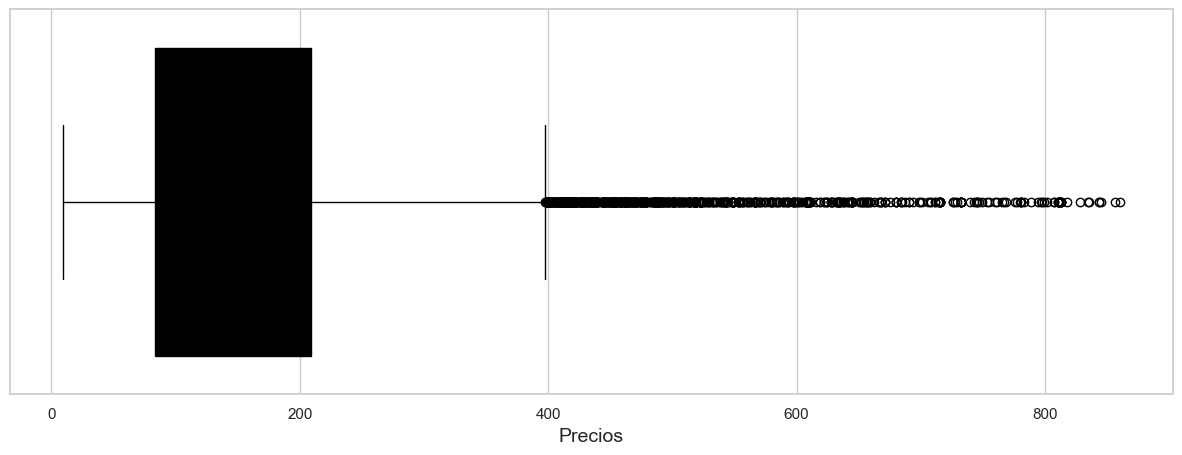

In [74]:
plt.figure(figsize=(15, 5)) 
sns.set(style="whitegrid")  
fig = sns.boxplot(x="price", data=df, color = 'black')  
fig.set_xlabel('Precios', fontsize=14)
plt.show()

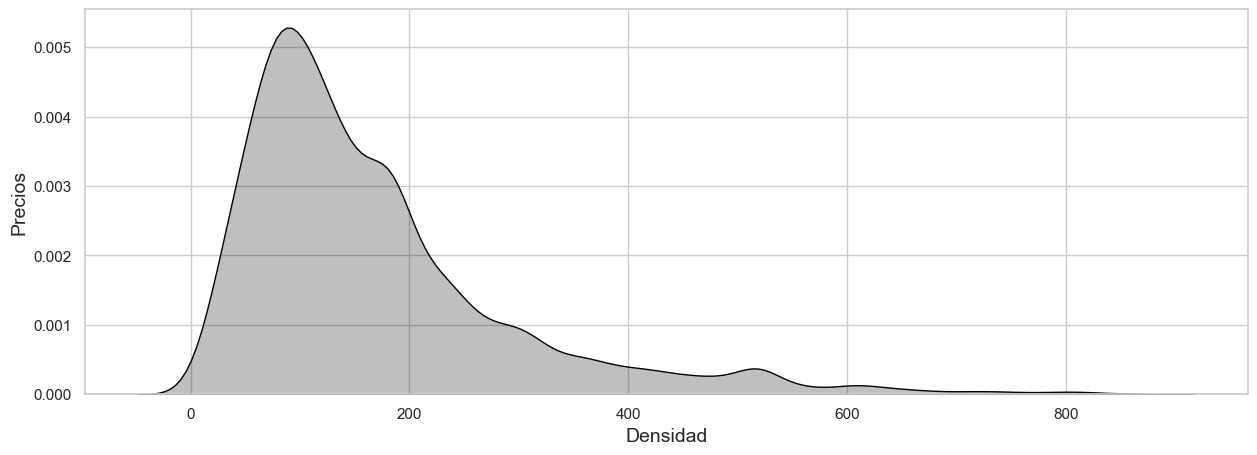

In [57]:
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=df, x='price', fill=True, color='black')
ax.set_xlabel('Densidad', fontsize=14)
ax.set_ylabel('Precios', fontsize=14)
plt.show()

In [58]:
#Guardar el df limpio en un csv
listings.to_csv('listings_limpio.csv', index=False)

In [59]:
#Guardar el df limpio en un csv
df.to_csv('airbnb_limpio.csv', index=False)

## 5. EDA

In [76]:
import plotly.colors
feq = df['accommodates'].value_counts().sort_index(ascending=False)
num_categories = len(feq)
colors = plotly.colors.qualitative.Dark24[:num_categories]

fig = px.bar(feq, title='Nº personas por alojamiento en Tokyo', template="plotly", labels=dict(index="Accommodates", value="Listings"), width=1000, color=colors,)


fig.show()
fig.write_html("personas_alojamiento.html")

In [77]:
precio = listings.groupby('neighbourhood')['price'].mean().sort_values(ascending = True)
dfprecio = pd.DataFrame(precio)
dfprecio = dfprecio.reset_index()

In [78]:
px.area(dfprecio, 
        x='neighbourhood',
        y='price',template = 'plotly',
        title = 'Average daily price based on location in Tokyo'
        )

In [79]:
price_neigh = listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)

In [80]:
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap

In [66]:
# tokyo_neighbourhoods.rename(columns={'neighbourhood': 'neighbourhood_cleansed'}, inplace=True)

In [82]:
tokyo_neighbourhoods = gpd.read_file(r'C:\Users\Jesús\Desktop\GitHub\TOKYO_AIRBNB\neighbourhoods.geojson')

price_neigh = price_neigh.transpose()
tokyo_neighbourhoods = pd.merge(tokyo_neighbourhoods, price_neigh, on='neighbourhood', how='left')

tokyo_neighbourhoods.rename(columns={'price': 'average_price'}, inplace=True)

tokyo_neighbourhoods.average_price = tokyo_neighbourhoods.average_price.round(decimals=2)

map_dict = tokyo_neighbourhoods.set_index('neighbourhood')['average_price'].to_dict()
colors = ['yellow', 'black']
color_scale = LinearSegmentedColormap.from_list(name='custom_colormap', colors=colors)

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    if value is not None:
        return color_scale(value)
    else:
        return 'grey'  

In [83]:
dfprecio['price']

0      30.790000
1      31.456667
2      31.810000
3      35.060000
4      35.516000
5      63.156667
6      77.977000
7      80.182000
8      84.518462
9      85.564868
10     87.161667
11     91.332500
12     93.600769
13     95.143333
14    106.425068
15    106.708824
16    109.908522
17    112.645833
18    114.496000
19    116.234571
20    123.909091
21    124.372840
22    134.511429
23    135.130694
24    137.726510
25    138.295455
26    138.657645
27    139.725385
28    143.444633
29    150.575184
30    158.906641
31    163.197039
32    163.257682
33    168.004938
34    172.873820
35    173.214926
36    180.560000
37    181.473333
38    191.685350
39    207.475528
40    213.461111
41    214.840390
42    217.754239
43    232.402481
44    240.373125
45    346.270824
46    429.440000
Name: price, dtype: float64

In [84]:
fig = px.choropleth_mapbox(dfprecio,
                        geojson=tokyo_neighbourhoods,
                        featureidkey='properties.neighbourhood',
                        locations ="neighbourhood",
                        color = 'price',
                        color_continuous_scale="portland",
                        title="Neighbourhoods in Tokyo",
                        zoom=9, hover_data = ['neighbourhood','price'],
                        mapbox_style="carto-positron",
                        width=1000,height=750,center = {"lat": 35.65, "lon": 139.50}
                        )

fig.update_traces(zmin=dfprecio['price'].min(), zmax=dfprecio['price'].max())

fig.update(layout_coloraxis_showscale=True)
fig.update_layout(paper_bgcolor="#1f2630",font_color="white",title_font_size=20, title_x = 0.5)
fig.show()
fig.write_html("mapa_precio.html")

In [85]:
latitudes = df['latitude'].tolist()
longitudes = df['longitude'].tolist()
coordenadas = list(zip(latitudes,longitudes))

In [71]:
# Defino la ubicacion inicial del mapa
latitud_1 = df['latitude'].iloc[0]
longitud_1 = df['longitude'].iloc[0]
# Crear el mapa de Folium con la ubicación inicial especificada
map = folium.Map(location = [latitud_1,longitud_1],zoom_start=10)
# Añadir las ubicaciones al mapa generado de Folium
FastMarkerCluster(data=coordenadas).add_to(map) # Se usa para agrupar los marcadores mas cercanos en clusteres
folium.Marker(location=[latitud_1,longitud_1]).add_to(map)
map

In [72]:
map.save('tokyo_map.html')

In [87]:
aloj_barrio = df['neighbourhood_cleansed'].value_counts().sort_values(ascending=True)

In [88]:
fig = px.bar(aloj_barrio, x=aloj_barrio.values, y=aloj_barrio.index,color=aloj_barrio.values, color_continuous_scale='Inferno', text_auto = False) #Con text_auto sale el nombre del conteo en cada barra
#actualizamos el layout
fig.update_layout(
    title='Número de alojamientos por barrios', title_x=0.5, 
    yaxis_title='Barrios Tokyo',
    xaxis_title='Número de alojamientos',
    template='plotly',
	width=1500, height=500) 


fig.show()
pio.write_html(fig, "alojamiento_barrio.html")

- Precio VS barrio

In [89]:
listings['neighbourhood'].unique()

array(['Sumida Ku', 'Kita Ku', 'Shibuya Ku', 'Suginami Ku', 'Setagaya Ku',
       'Adachi Ku', 'Higashimurayama Shi', 'Katsushika Ku',
       'Shinagawa Ku', 'Shinjuku Ku', 'Meguro Ku', 'Taito Ku',
       'Nakano Ku', 'Koto Ku', 'Hino Shi', 'Mitaka Shi', 'Ota Ku',
       'Toshima Ku', 'Akishima Shi', 'Bunkyo Ku', 'Hachioji Shi',
       'Itabashi Ku', 'Edogawa Ku', 'Arakawa Ku', 'Nerima Ku',
       'Machida Shi', 'Tama Shi', 'Kodaira Shi', 'Minato Ku', 'Komae Shi',
       'Chofu Shi', 'Fuchu Shi', 'Chuo Ku', 'Chiyoda Ku', 'Fussa Shi',
       'Nishitokyo Shi', 'Akiruno Shi', 'Koganei Shi', 'Kunitachi Shi',
       'Ome Shi', 'Kokubunji Shi', 'Hamura Shi', 'Tachikawa Shi',
       'Musashino Shi', 'Musashimurayama Shi', 'Okutama Machi',
       'Hinohara Mura'], dtype=object)

In [90]:
barrio_precio = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)

In [91]:
fig = px.bar(barrio_precio,
            color=barrio_precio.values,
            color_continuous_scale='Inferno', 
            labels={'y':'Barrios Tokyo', 'x':'Precio medio por noche', 'color': 'Precio medio'},
            template='plotly',width=1300, height=600)

fig.update_layout(title='Precio medio por alojamiento y barrio', title_x=0.5, 
  xaxis_title='Barrios Tokyo',
  yaxis_title='Precio medio por noche')
fig.show()
pio.write_html(fig, "preciomedio_barrio.html")

In [92]:
fig.write_html("grafico_precios_interactivo.html")

- PRECIO TIPO HABITACIÓN

In [94]:
fig = px.box(df, 
             x='room_type', 
             y='price', 
             template='plotly',
             title='Price per Room type')

fig.update_layout(xaxis_title='Room Type')
fig.update_layout(yaxis_title='Price')
fig.update_layout(width=1100, height=550)


fig.show()
pio.write_html(fig, "grafico_boxplot.html")

- HOST RATING SCORE

In [ ]:
fig = px.histogram(df,
                 x = 'review_scores_rating',
                 facet_col= 'host_is_superhost',
                 nbins=30,
                
                 title= 'Rating score by superhost',
                 template='plotly'
                )

fig.show()

review_superhost_mean_true = df.loc[df['host_is_superhost']=='t', 'review_scores_rating'].mean()
review_superhost_mean_false = df.loc[df['host_is_superhost']=='f', 'review_scores_rating'].mean()

In [ ]:
host_mas = df['host_id'].value_counts().sort_index()

In [ ]:
fig = px.histogram(host_mas, marginal='violin', template='plotly', color_discrete_sequence=['black'])
fig.show()

-------


------

- Puntuación general VS barrio

In [96]:
punt_barrio_general = df.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().sort_values().reset_index()
punt_barrio_localiz = df.groupby('neighbourhood_cleansed')['review_scores_location'].mean().sort_values().reset_index()

In [97]:
fig = px.bar(punt_barrio_general, x='review_scores_rating', y='neighbourhood_cleansed', color='review_scores_rating', color_continuous_scale='Inferno')
fig.update_layout(height=500, width=1500, title_text="Puntuación de los alojamientos por barrios (0-5)", title_x=0.5,xaxis_title='Puntuación general',yaxis_title = '',
                  coloraxis_colorbar_title='Puntuación')  

fig.show()
pio.write_html(fig, "puntuacion_barrio.html")


In [98]:
fig = px.bar(punt_barrio_localiz, x='review_scores_location', y='neighbourhood_cleansed', color='review_scores_location', color_continuous_scale='Inferno')
fig.update_layout(height=500, width=1500, title_text="Puntuación de los alojamientos por barrios (0-5)", title_x=0.5,xaxis_title='Puntuación de la localización',yaxis_title = '',coloraxis_colorbar_title='Puntuación')
fig.show()
pio.write_html(fig, "puntuacion_localizacion.html")


- Análisis del tipo de alojamiento más habitual en los anuncios

Variables ``property_type`` y ``room_type``. No tienen nulos

In [ ]:
df['property_type'].value_counts()

Entire rental unit                    7470
Entire home                           1589
Room in hotel                          907
Private room in rental unit            605
Private room in home                   586
Entire condo                           321
Room in aparthotel                     307
Entire serviced apartment              255
Room in boutique hotel                 207
Shared room in hostel                  200
Private room in hostel                 182
Entire villa                           110
Room in hostel                          72
Shared room in rental unit              68
Private room in serviced apartment      65
Entire loft                             57
Private room in condo                   40
Private room in ryokan                  37
Shared room in home                     32
Private room in guesthouse              29
Private room in hut                     27
Shared room in hotel                    26
Entire townhouse                        19
Shared room

In [ ]:
aloj = df.groupby(['property_type', 'room_type']).size().reset_index(name='count') 
aloj = aloj[aloj['count']>200].sort_values(by=['count']) 

In [ ]:
df['room_type'].value_counts()

Entire home/apt    10104
Private room        2766
Shared room          388
Hotel room           160
Name: room_type, dtype: int64

In [95]:
room_price_mean = df.groupby('room_type')['price'].mean()
num_categories = len(room_price_mean)
colors = plotly.colors.qualitative.Dark24[:num_categories]

fig = px.bar(room_price_mean,
             title='Precio medio',
             template="plotly",
             labels=dict(index="room type", value="price"),
             width=1000,
             color=colors,
             )


fig.show()
pio.write_html(fig, "precio_habitacion.html")


In [99]:

fig = px.scatter(df,
                y= 'number_of_reviews',
                x= 'reviews_per_month',
                title='Total reviews por mes',
                template="plotly",
                trendline='ols',
                trendline_color_override='red',
                color='price'
            )


fig.show()
pio.write_html(fig, "grafico_reviews_por_mes.html")


- Nº de personas que se alojan en los apartamentos: Lo más frecuente son 2 personas. El máximo es 16, que es lo permitido por Airbnb.

In [ ]:
Accomm = df['accommodates'].value_counts().sort_index().reset_index(name='Alojamientos').sort_values(by = 'Alojamientos')
Accomm = Accomm.rename(columns={'index': 'Indice'})
fig = px.bar(Accomm, y='Alojamientos', x='Indice',color_discrete_sequence=['black'])

fig.update_layout(
    title='Número de personas que se alojan en las viviendas', title_x=0.5, 
    yaxis_title='Número de alojamientos',
    xaxis_title='Número de personas',
    template='plotly_white',
	width=1500, height=500) 
fig.update_xaxes(dtick=1) 

In [101]:
punt_precio = df.groupby('review_scores_rating')['price'].mean().sort_values().reset_index()
precio_medio = df['price'].mean().round(2)

fig = px.scatter(punt_precio, y='price', x='review_scores_rating',opacity=0.7, 
                color_discrete_sequence=['black'], 
                labels={'price': 'Precio', 'review_scores_rating': 'Puntuación general (0-5)'}
                )
fig.update_layout(height=500, width=1500, 
                title_text="Relación entre el precio y la puntuación general de los alojamientos", 
                title_x=0.5,
                xaxis_title="Puntuación general (0-5)", 
                yaxis_title="Precio"
                )  
fig.update_traces(marker=dict(size=7)) 
fig.add_hline(y=precio_medio, line_dash="dot", line_color="black", annotation_text=f"Precio medio: {precio_medio}",
            annotation_position="top left")

fig.show()
fig.write_html("grafico_relacion_precio_puntuacion.html")

In [102]:
punt_dispo = df.groupby('review_scores_rating')['availability_30'].mean().sort_values().reset_index()
punt_media = df['review_scores_rating'].mean().round(2)

fig = px.scatter(punt_dispo, x='availability_30', y='review_scores_rating', opacity=0.7, color_discrete_sequence=['black'],
                 labels={'availability_30': 'Disponibilidad próximos 30 d', 'review_scores_rating': 'Puntuación general (0-5)'})

fig.update_layout(height=500, width=1500,
                  title_text="Relación entre disponibilidad y la puntuación general de los alojamientos",
                  title_x=0.5, yaxis_title="Puntuación general (0-5)", xaxis_title="Disponibilidad próximo mes")
fig.update_traces(marker=dict(size=7))
fig.add_hline(y=punt_media, line_dash="dot", line_color="black", annotation_text=f"Puntuación media: {punt_media}",
              annotation_position="top left")

fig.show()
fig.write_html("grafico_relacion_disponibilidad_puntuacion.html")

- Estudio de la variable ``host``:

 Top 10 host (los que más anuncios tienen)

In [ ]:
top10_host=df['host_id'].value_counts().head(10)
top10_host

110379659    100
229627088     78
247326938     73
228133407     65
94302731      64
183877565     62
42244167      54
197405131     52
4981880       51
214640453     48
Name: host_id, dtype: int64

In [ ]:
df_top10_host = df[df['host_id'].isin(top10_host.index)]
df_top10_host['host_listings_count'].sort_values()

850       52
5909      52
5911      52
6090      52
6094      52
6110      52
6111      52
6237      52
5850      52
6440      52
6565      52
6593      52
6596      52
6606      52
6653      52
6728      52
6799      52
6532      52
7196      52
5846      52
5789      52
4271      52
4314      52
4315      52
4321      52
4322      52
4323      52
4454      52
5844      52
4460      52
4462      52
5340      52
5345      52
5565      52
5738      52
5739      52
5786      52
4461      52
7339      52
13712     52
8253      52
11356     52
12165     52
12192     52
12193     52
12753     52
12754     52
12827     52
11070     52
12884     52
12996     52
13349     52
13472     52
13576     52
13578     52
13580     52
13584     52
12901     52
10842     52
10757     52
10756     52
8363      52
8518      52
8526      52
8528      52
8956      52
9193      52
9195      52
9369      52
9478      52
9814      52
10349     52
10350     52
10351     52
10352     52
10353     52
10733     52

De esos, ¿cuántos son superhost? ¿Y en total cuál es la proporción de host/superhost?

In [ ]:
df['host_is_superhost'].value_counts()

1.0    8982
0.0    4436
Name: host_is_superhost, dtype: int64

In [ ]:
df['host_is_superhost']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        1.0
6        1.0
7        1.0
8        0.0
9        0.0
10       1.0
11       1.0
12       0.0
13       0.0
14       0.0
15       0.0
16       1.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       1.0
26       0.0
27       1.0
28       0.0
29       1.0
30       0.0
31       1.0
32       0.0
33       0.0
34       1.0
35       1.0
36       1.0
37       0.0
38       0.0
39       0.0
40       1.0
41       1.0
42       1.0
43       0.0
44       0.0
45       0.0
46       0.0
47       0.0
48       0.0
49       1.0
50       0.0
51       0.0
52       0.0
53       0.0
54       0.0
55       1.0
56       1.0
57       0.0
58       0.0
59       0.0
60       0.0
61       0.0
62       0.0
63       0.0
64       0.0
65       0.0
66       0.0
67       0.0
68       0.0
69       1.0
70       0.0
71       0.0
72       1.0
73       0.0
74       0.0
75       1.0
76       0.0

-----

# REVISEMOS RESEÑAS

In [ ]:
listings['listing_id'] = listings['id']

In [ ]:
com = pd.merge(com, listings[['listing_id', 'host_id', 'host_name', 'name']], on = 'listing_id', how = "left")
com = com[['listing_id', 'name', 'host_id', 'host_name', 'date', 'reviewer_id', 'reviewer_name', 'comments']]
com.head()

listing_id                                                         name  \
0      197677  Rental unit in Sumida · ★4.77 · 1 bedroom · 2 beds · 1 bath   
1      197677  Rental unit in Sumida · ★4.77 · 1 bedroom · 2 beds · 1 bath   
2      197677  Rental unit in Sumida · ★4.77 · 1 bedroom · 2 beds · 1 bath   
3      197677  Rental unit in Sumida · ★4.77 · 1 bedroom · 2 beds · 1 bath   
4      197677  Rental unit in Sumida · ★4.77 · 1 bedroom · 2 beds · 1 bath   

   host_id        host_name        date  reviewer_id  reviewer_name  \
0   964081  Yoshimi & Marek  2011-09-21      1002142          Pablo   
1   964081  Yoshimi & Marek  2011-10-14      1031940  Ana & Ricardo   
2   964081  Yoshimi & Marek  2011-11-21      1097040         Samuel   
3   964081  Yoshimi & Marek  2011-11-30      1183674           Lisa   
4   964081  Yoshimi & Marek  2012-01-09      1538004         Langan   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  comments  
0                                                                                                                                                                                                                                                                     Couldn’t get any better!\r<br/>\r<br/>The apartment itself is great; it has everything you could need.\r<br/>\r<br/>Besides that the neighborhood itself is very friendly fill with family life energy. Really close to a supermarket, some convenience stores and train stations, you will feel like home from the first moment and if you forget to pack something you could easily get it.\r<br/>  
1                                                                                                                            The apartment is bigger than it looks in the pictures. Perfect for a couple. Clean, well maintained, safe and with lot of useful information. As Westerners we found the tatami floor to have a strange smell but we later discovered that every tatami room have the same smell :)\r<br/>It is located about 10 min on foot from subway station (JR pass not valid on this line) and within walking distance from supermarket, shops and restaurants. Overall we had a great experience and we'd recommend it to anybody traveling to Tokyo.  
2                                                                                                                                                                                                                                                                                                                      The appartement is perfect for a couple! It is a bit small but the really furniture which is really complete makes up for it, everything you need in tne everyday life is provided! We also enjoyed  the neighbourhood a lot, it is a charming place close to the principal cities of tokyo.\r<br/>Thanks for letting us stay, we will visit again!  
3  We had a terrific stay at Yoshimi and Marek's lovely apartment.  Everything was brand new, organized and tidy, and we had all the comforts and conveniences we needed.  The "Survival Kit" they left for us was packed with information on the home and the neighborhood, and even included emergency numbers and other details that we had not seen at other rentals.  The apartment is Japanese in scale, small by our American standards, but everything is designed so well that it was quite comfortabl

In [ ]:
host_reviews = com.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).to_frame(name = "number_of_reviews")
host_reviews.head()

number_of_reviews
host_id   host_name                   
41013044  Aileen                  4282
30883070  Takeshi                 3752
20833491  David                   3339
42244167  Hiro                    2939
129096261 Chisaki                 2758

In [ ]:
com.comments.head()

0                                                                                                                                                                                                                                                                       Couldn’t get any better!\r<br/>\r<br/>The apartment itself is great; it has everything you could need.\r<br/>\r<br/>Besides that the neighborhood itself is very friendly fill with family life energy. Really close to a supermarket, some convenience stores and train stations, you will feel like home from the first moment and if you forget to pack something you could easily get it.\r<br/>
1                                                                                                                              The apartment is bigger than it looks in the pictures. Perfect for a couple. Clean, well maintained, safe and with lot of useful information. As Westerners we found the tatami floor to have a strange smell but we later d

In [ ]:
com.comments.values[2] 

'The appartement is perfect for a couple! It is a bit small but the really furniture which is really complete makes up for it, everything you need in tne everyday life is provided! We also enjoyed  the neighbourhood a lot, it is a charming place close to the principal cities of tokyo.\r<br/>Thanks for letting us stay, we will visit again!'

In [ ]:
# Procesamiento del lenguaje natural
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jesús\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop_english = stopwords.words("english") 

In [ ]:
com = com[com['comments'].notnull()]

com['comments'] = com['comments'].str.replace('\d+', '') 
com['comments'] = com['comments'].str.lower()
com['comments'] = com['comments'].str.replace('\r\n', "")
stop_english = stopwords.words("english")
com['comments'] = com['comments'].apply(lambda x: " ".join([i for i in x.split() 
                                                    if i not in (stop_english)]))
com['comments'] = com['comments'].str.replace('[^\w\s]'," ")
com['comments'] = com['comments'].str.replace('\s+', ' ')

com.comments.values[2] 

'appartement perfect couple bit small really furniture really complete makes it everything need tne everyday life provided also enjoyed neighbourhood lot charming place close principal cities tokyo br thanks letting us stay visit again '

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
texts = com.comments.tolist()

vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
cvec_df.head(10)

words  counts
3          br  290545
90      place  157264
96       stay  125242
6       great  124252
140  location   90087
60    station   89485
39      clean   83814
76      tokyo   74020
576      host   65631
151      good   63177

In [ ]:
cvec_df = cvec_df.drop(cvec_df[cvec_df['words'] == 'br'].index)

In [ ]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

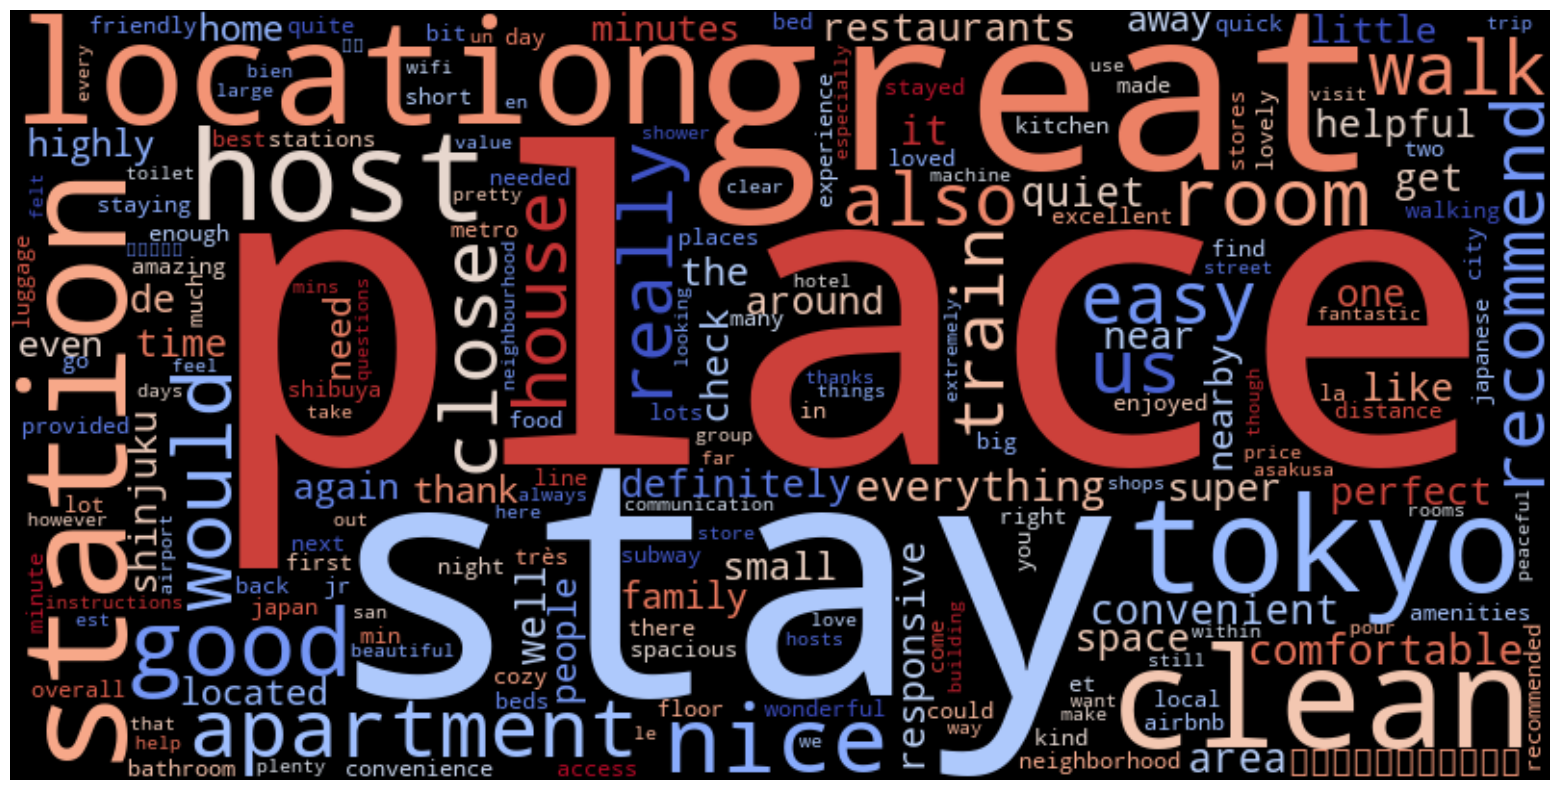

In [ ]:
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(width=800, height=400, colormap='coolwarm')
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

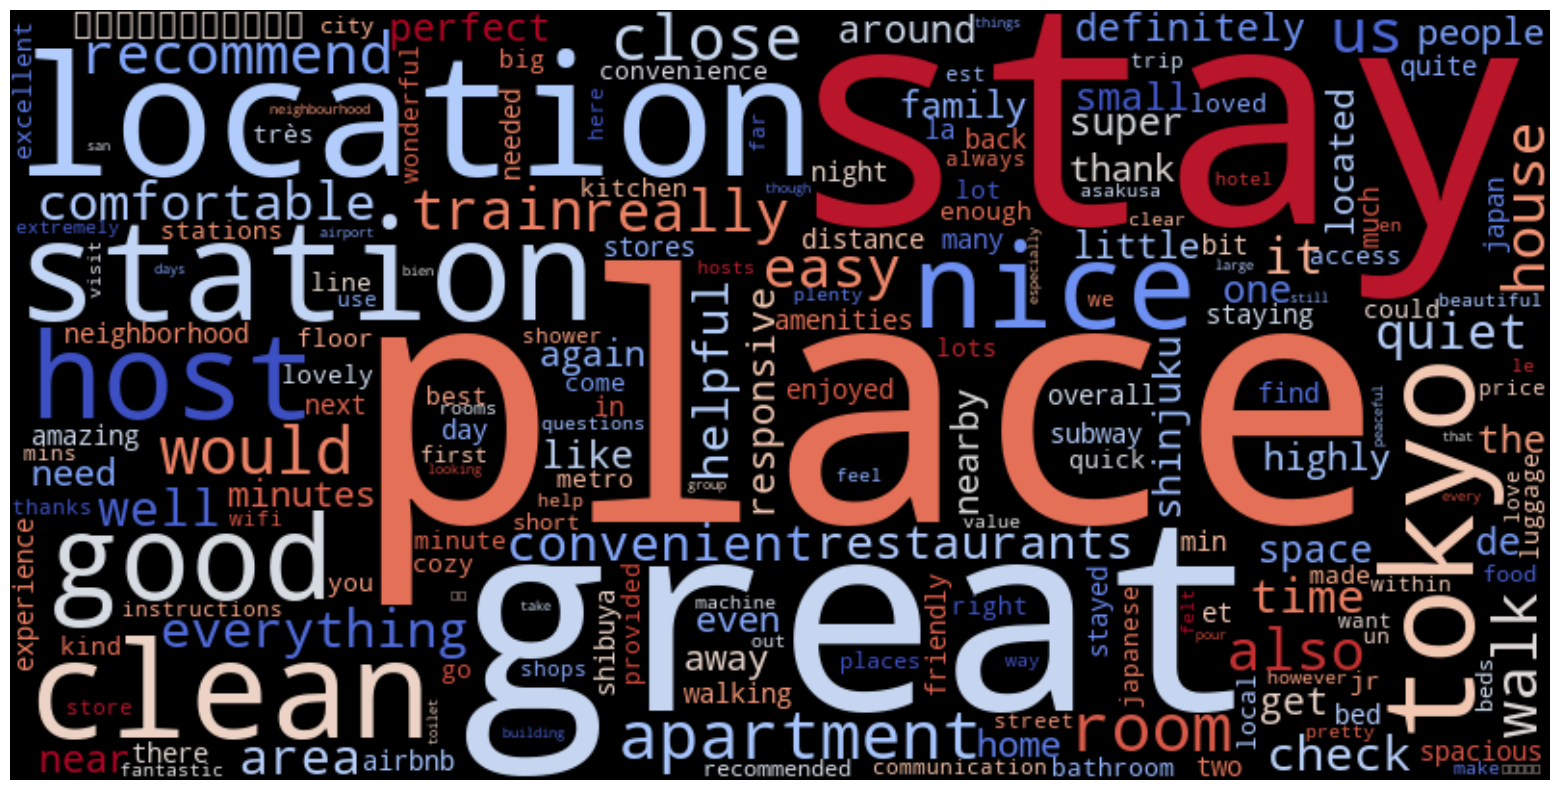

In [ ]:
wordcloud = WordCloud(width=800, height=400, colormap='coolwarm')
wordcloud.generate_from_frequencies(frequencies=cvec_dict)

# Configurar la visualización de Matplotlib
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

# Guardar la WordCloud como archivo de imagen
wordcloud.to_file("wordcloud.png")

# Mostrar la visualización
plt.show()

In [ ]:
data_limpio = 'data_limpio.csv'
df.to_csv(data_limpio, index=False)

--------

### Test de hipótesis

Ratio respuesta/aceptación

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(df['host_response_rate'])
print('stat=%.3f, p=%.3f' % (stat, p)) 
if p > 0.05:
	print('No podemos rechazar que siga una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=0.150, p=0.000
No sigue una distribución Gaussiana


c:\Users\Jesús\Desktop\BOOTCAMP\entorno\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



In [ ]:
from scipy.stats import normaltest
stat, p = normaltest(df['host_response_rate'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que siga una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=23906.106, p=0.000
No sigue una distribución Gaussiana


Al no seguir una distribución normal, pasamos a hacer test no paramétricos para observar si las variables ``host_response_rate`` y ``host_acceptance_rate`` siguen la misma distribución:

In [ ]:
# test U Mann-Whitney
from scipy.stats import mannwhitneyu

mean_response = df['host_response_rate'].mean()

grupo_A = df[df['host_response_rate'] >= mean_response]['host_acceptance_rate']
grupo_B = df[df['host_response_rate'] <  mean_response]['host_acceptance_rate']

stat, p = mannwhitneyu(grupo_A, grupo_B) 
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente tengan la misma distribución')
else:
	print('Probablemente tengan distinta distribución')

stat=12462718.500, p=0.000
Probablemente tengan distinta distribución
